In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Variables libres ------------------------------------------------------
h_e = 1
h_i = 2
th_i = 0
q = 4
d = 0.05


NumVariables = 21**2

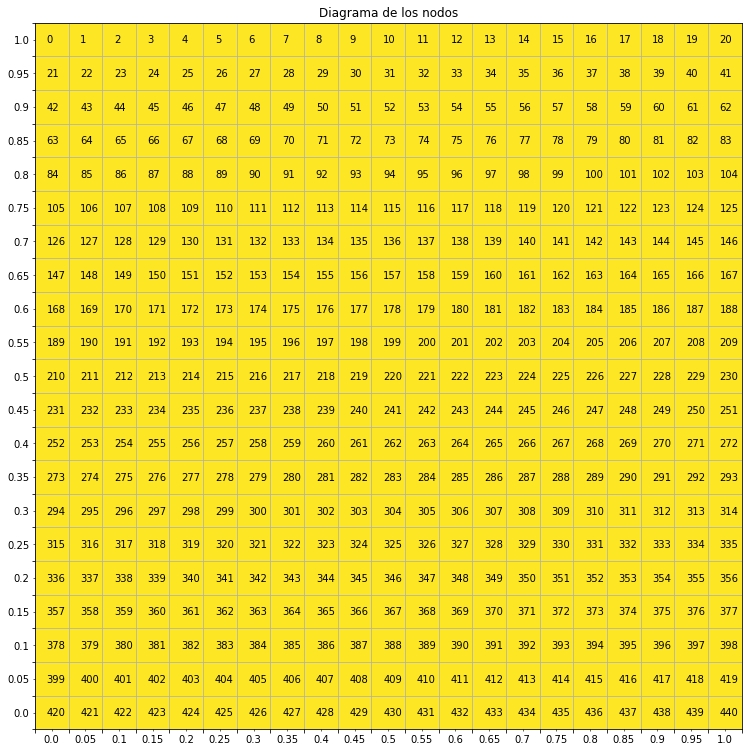

In [3]:
# Diagrama de los nodos ----------------------------------------------------
nodos = np.arange(0,NumVariables)
nodos = nodos.reshape((21,21))
fig,ax = plt.subplots(figsize=(13,13))
#plt.imshow(nodos,vmin=-200,vmax=700)
plt.imshow(nodos,vmin=-200,vmax=0)

ax.set_xticks(np.arange(0,21),minor=True)
ax.set_xticklabels(np.arange(0,21)/20,minor=True)
ax.set_xticks(np.arange(0,22)-0.5)
ax.set_xticklabels(np.repeat([''],21))

ax.set_yticks(np.arange(0,21),minor=True)
ax.set_yticklabels(np.round(1-np.arange(0,21)/20,decimals=2),minor=True)
ax.set_yticks(np.arange(0,22)-0.5)
ax.set_yticklabels(np.repeat([''],21))
plt.grid()


for i in np.arange(0,21):
    for j in np.arange(0,21):
        plt.text(j-0.15,i+0.1,nodos[i,j])
        
plt.title('Diagrama de los nodos')
plt.show()
#plt.close()

In [4]:
# Matriz de coeficientes ------------------------------------------------------------------
A = np.zeros((NumVariables,NumVariables))
y = np.zeros(NumVariables) 
internos = []
canal = []

#Lleno ecuaciones de nodos internos -----------------------------------------------------------
for alfa in range(22,41): #el índice alfa recorre los nodos de izquierda a derecha
    for beta in 21*np.arange(0,19): #el índice beta recorre los nodos de arriba a abajo
        i = alfa+beta
        A[i,i] = -4
        A[i,i-1] = 1; A[i,i+1]=1; A[i,i-21]=1; A[i,i+21]=1
        internos.append(i)

#Llena los nodos en el canal de refrigeración --------------------------------------------------
for alfa in range(21*15+1,21*15+6): 
    for beta in 21*np.arange(0,5):
        i = alfa+beta
        A[i,i] = 1
        A[i,i-1] = 0; A[i,i+1]=0; A[i,i-21]=0; A[i,i+21]=0
        y[i] = th_i
        canal.append(i)

# Asigna el nodo de esquina interna
A[320,320] = -2*(3+h_i*d); A[320,320-1] = 1; A[320,320+1] = 2; A[320,320-21] = 2; A[320,320+21] = 1
y[320] = -2*h_i*d*th_i
        
internos = np.array(internos).reshape((19,19)).T
canal = np.array(canal).reshape(5,5).T
# print(canal)
# print(internos)

In [5]:
bordes1 = []
bordes2 = []
bordes3 = []
bordes4 = []

canal1 = []
canal2 = []

bordes5 = []
bordes6 = []

#Lleno ecuaciones de nodos de borde --------------------------------------------------------------
for alfa in range(1,20): 
    i = alfa # recorre el borde superior
    A[i,i] = -2*(h_e*d + 2)
    A[i,i-1] = 1; A[i,i+1] = 1; A[i,i+21] = 2;
    bordes1.append(i)
    
    i = 21*alfa # recorre el borde izquierdo (implementando condición de simetría)
    A[i,i] = -4
    A[i,i+1] = 2; A[i,i+21] = 1; A[i,i-21] = 1;
    bordes2.append(i)
    
    i = 20 + 21*(alfa) #recorre el borde derecho
    A[i,i] = -2*(h_e*d + 2)
    A[i,i-1] = 2; A[i,i-21] = 1; A[i,i+21] = 1;
    bordes3.append(i)
    
    i = 420 + alfa # recorre el borde inferior (implementando condición de simetría)
    A[i,i] = -4
    A[i,i-21] = 2; A[i,i-1] = 1; A[i,i+1] = 1;
    bordes4.append(i)

#Llena los nodos en el canal de refrigeración ----------------------------------------------------------
for alfa in range(0,5): 
    i = 21*15 + 21*alfa # recorre el borde izquierdo del canal
    A[i,i] = 1
    A[i,i+1] = 0; A[i,i+21] = 0; A[i,i-21] = 0;
    y[i] = th_i
    canal1.append(i)
    
    i = 21*20 + 1 + alfa #recorre el borde inferior del canal
    A[i,i] = 1
    A[i,i-21] = 0; A[i,i-1] = 0; A[i,i+1] = 0;
    y[i] = th_i
    canal2.append(i)


#Llena los nodos en el borde del canal de refrigeración ----------------------------------------------------------
for alfa in range(4): 
    i = 341 + 21*alfa # Recorre el borde derecho
    A[i,i] = -2*(h_i*d + 2)
    A[i,i-21] = 1; A[i,i+21] = 1; A[i,i+1] = 2
    y[i] = -2*h_i*d*th_i
    bordes5.append(i)
    
    i = 21*15 + alfa+1 # Recorre el borde superior
    A[i,i] = -2*(h_i*d + 2)
    A[i,i-1] = 1; A[i,i+1] = 1; A[i,i-21] = 2
    y[i] = -2*h_i*d*th_i
    bordes6.append(i)


# print(bordes1)
# print(bordes2)
# print(bordes3)
# print(bordes4)
# print(canal1)
# print(canal2)
# print(bordes5)
# print(bordes6)

In [6]:
#Llena nodos de esquina ----------------------------------------------------------------------

A[0,0] = 3; A[0,1] = -4; A[0,2] = 1
A[20,20] = -2*(h_e*d + 1); A[20,19] = 1; A[20,41] = 1
A[440,440] = -2; A[440,419] = 1; A[440,439] = 1

A[420,420] = 1; y[420] = th_i
A[315,315] = -2; A[315,316] = 1; A[315,315-21] = 1
A[425,425] = -2; A[425,404] = 1; A[425,426] = 1


In [7]:
# Asigna los nodos con generación de calor  --------------------------------------------------------------
barra1 = []
barra2 = []
barra3 = []

for alfa in range(21*5+10,21*5+16):
    for beta in 21*np.arange(0,6):
        i = alfa+beta
        y[i] = -q*d**2
        barra1.append(i)
        
        i = alfa+beta-10
        y[i] = -q*d**2
        barra2.append(i)
        
        i = alfa+beta + 210
        y[i] = -q*d**2
        barra3.append(i)
        

barra1 = np.array(barra1).reshape((6,6)).T
barra2 = np.array(barra2).reshape((6,6)).T
barra3 = np.array(barra3).reshape((6,6)).T
# print(barra1)
# print(barra2)
# print(barra3)

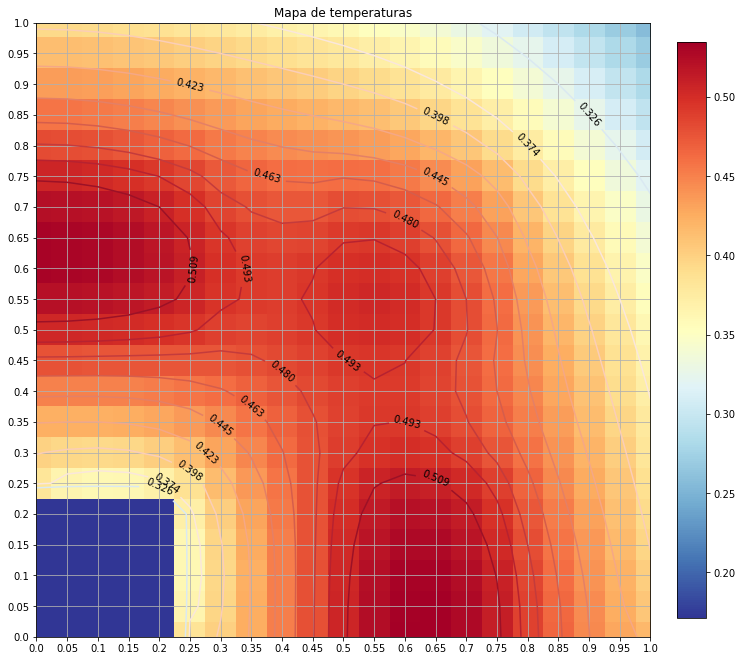

In [9]:
# Solución ----------------------------------------------------------------
thetas = np.matmul(np.linalg.inv(A),y)
thetas2 = thetas.reshape((21,21))
#print(np.around(thetas2,decimals=2))

# Mapa de calor --------------------------------------------------------------
fig,ax = plt.subplots(figsize=(12,12))
min_col = min(thetas[np.where(thetas!=0.)])/1.5
mapa = ax.imshow(thetas2,cmap='RdYlBu_r',vmin=min_col,vmax=max(thetas)) #afmhot RdBu_r
plt.ylim(20,0)
plt.xlim(0,20)
plt.yticks(np.arange(21),np.round(1-np.arange(0,21)/20,decimals=2))
plt.xticks(np.arange(21),np.arange(21)/20)
plt.colorbar(mapa,fraction=0.043, pad=0.04)
ax.grid()
plt.title('Mapa de temperaturas')

cat = np.sort(thetas)[np.array(len(thetas)/10*np.arange(1,10),dtype=int)]
cont = ax.contour(thetas2,levels=cat,cmap='RdBu_r',vmin=min_col,vmax=max(thetas))
ax.clabel(cont, inline=1, fontsize=10,colors='black')
plt.show()